# Grundlagen der Multimediatechnik
## Wintersemester 2021/2022

## Übungslatt 6
<b>Wichtig</b>: Bitte kennzeichnen Sie Ihre Abgabe mit Ihrem Namen und dem Namen Ihres Übungspartners. <br>
Laden Sie bitte Ihre Abgabe als PDF-/ZIP-Datei auf der ILIAS-Plattform hoch. Andere Dateiformate sowie Scans von handgeschriebenen Abgaben werden nicht gewertet. Achten Sie darauf, nur kompilierbaren, kommentierten Code abzugeben. Nicht-kompilierbarer Code wird mit <b>0 Punkten</b> bewertet! \\
Alle Abgaben müussen folgender Namenskonvention entsprechen:  `gmt_uebungXX_nachname1_nachname2.format` <br>
Im Falle Ihres Notebooks: `gmt_uebungXX_nachname1_nachmame2.ipynb`

    Aufgabe 1: 8 von 8
    Aufgabe 2: 17 von 17
    Summe:     25 von 25    super! :D

In [1]:
# imports

import numpy as np
import cv2
import matplotlib.pyplot as plt

### Aufgabe 1 - Rauschreduktion 2 (8 Punkte)
Verwenden Sie für beide Teilaufgaben das Salt-and-Pepper-verrauschte Bild `oilwagon_snp.jpg`, welches auf ILIAS heruntergeladen werden kann. <br>

<b>Tipp:</b> Überschreiben Sie nicht die Pixel im Ursprungsbild, sonst werden bereits gefilterte Pixel als Grundlage für die weitere Verarbeitung herangezogen. Erstellen Sie stattdessen ein neues leeres Bild der gleichen Größe und speichern Sie dort die gefilterten Pixel.
1. Implementieren Sie die in der Vorlesung präsentierte Variante des $3\times 3$ Boxcar-Filters. Ihr Filter soll dabei für Graustufenbilder funktionieren. Berechnen Sie die Pixelwerte am Rand des Bildes, indem Sie davon ausgehen, dass alle Pixel außerhalb des Bildbereiches den Wert 0 besitzen (Zero-Padding). 

In [2]:
img_wagon_snp = plt.imread("oilwagon_snp.jpg") # read image

In [3]:
# TODO Boxcar Filter
def getKernelLen(kSize):
    return int((kSize-1)/2)
def padImg(img, padVal, kSize):
    h,w = img.shape
    kLen = getKernelLen(kSize)
    paddedImg = np.full((h+(kSize-1),w+(kSize-1)), 0, dtype='uint8')
    paddedImg[kLen:-kLen,kLen:-kLen] = img

    paddedImg[0,:] = padVal
    paddedImg[:,0] = padVal
    paddedImg[:,-1] = padVal
    paddedImg[-1,:] = padVal

    return paddedImg

def boxcarFilter3x3(img):
    h,w = img.shape
    newImg = np.full((h,w), 0, dtype='uint8')
    paddedImg = padImg(img, 0, 3)

    for row in range(h):
        for col in range(w):
            window = paddedImg[row:row+3, col:col+3]
            newVal = np.sum(window)/9
            newImg[row][col] = np.round(newVal)

    return newImg

In [4]:
result_b = boxcarFilter3x3(img_wagon_snp)

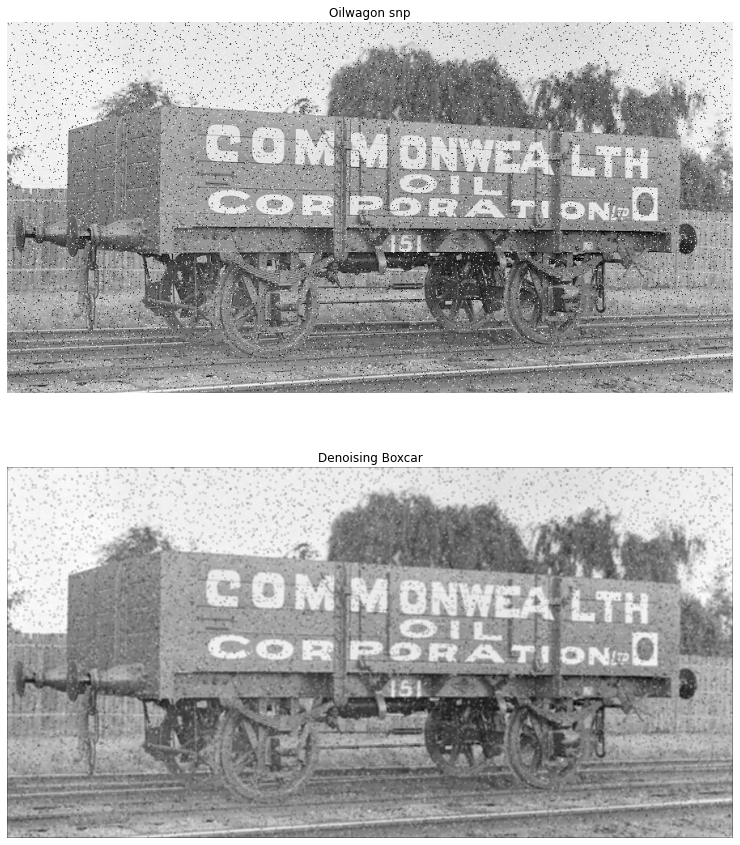

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) # create a subplot
axs[0].imshow(img_wagon_snp, cmap = 'gray')
axs[0].set_title('Oilwagon snp')
axs[0].axis('off')
axs[1].imshow(result_b, cmap = 'gray')
axs[1].set_title('Denoising Boxcar')
axs[1].axis('off')
plt.show()

2. Implementieren Sie die in der Vorlesung präsentierte Variante des $3\times 3$ Median-Filters. Ihr Filter soll dabei für Graustufenbilder funktionieren. Berechnen Sie die Pixelwerte am Rand des Bildes, indem Sie davon ausgehen, dass alle Pixel außerhalb des Bildbereiches den Wert 0 besitzen (Zero-Padding).

In [6]:
def medianFilter3x3(img):
    def getMedian(arr):
        medianIndex = 4 # 9/2 = 4.5 => 5 => for indexing: 5-1
        # super, dass mit dem Index haben viele andere falsch gemacht :)
        listOfElements = arr.flatten()
        medianVal = np.sort( listOfElements )[medianIndex]

        return medianVal

    h,w = img.shape
    newImg = np.full((h,w), 0, dtype='uint8')
    paddedImg = padImg(img, 0, 3)

    for row in range(h):
        for col in range(w):
            window = paddedImg[row:row+3, col:col+3]
            newVal = getMedian(window)
            newImg[row][col] = np.round(newVal)

    return newImg

In [7]:
result_m = medianFilter3x3(img_wagon_snp)

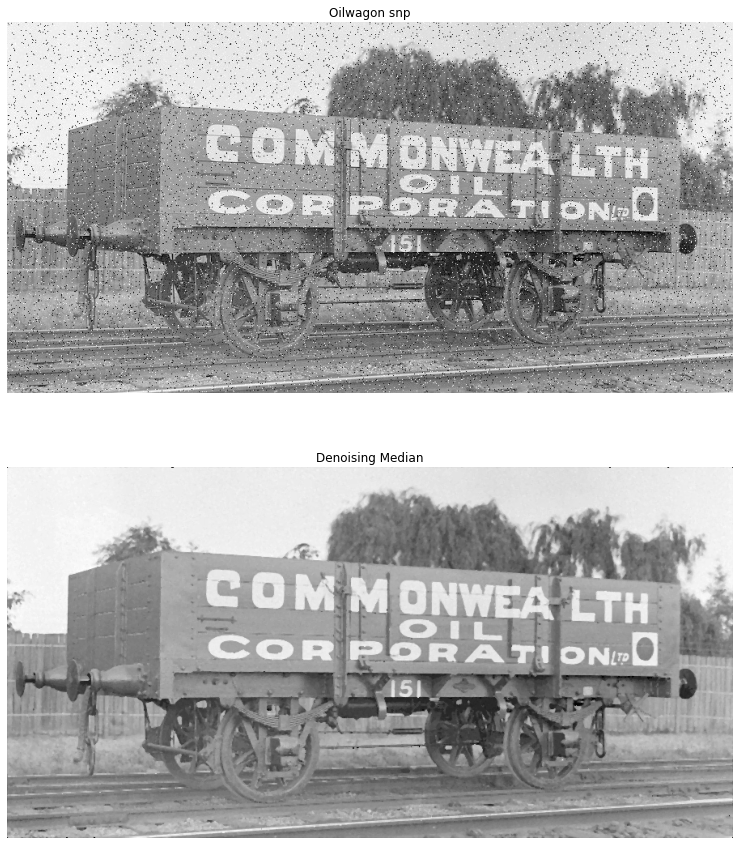

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) # create a subplot
axs[0].imshow(img_wagon_snp, cmap = 'gray')
axs[0].set_title('Oilwagon snp')
axs[0].axis('off')
axs[1].imshow(result_m, cmap = 'gray')
axs[1].set_title('Denoising Median')
axs[1].axis('off')
plt.show()

### Aufgabe 2 - Canny Algorithmus (17 Punkte)
Der Canny Algorithmus ist ein robuster Algorithmus zur Kantendetektion und beinhaltet mehrere Schritte. Ziel dieser Aufgabe ist es, den Anfang des Algorithmus zu implementieren.
1. Wandeln Sie zunächst das gegebene Farbbild `lena.jpg`, welches Sie auf ILIAS finden, in ein Graustufenbild um. Implementieren Sie hierfür die `rgb2grayscale()`-Funktion. <br>
   **Hinweis:** Beachten Sie, dass bei der Graustufenumwandlung die einzelnen Farbkanäle unterschiedlich gewichtet werden:
   $$G(x, y) = R(x, y)\cdot 0.299 + G(x, y)\cdot 0.587 + B(x, y) \cdot 0.114$$

In [9]:
lena_img = plt.imread('lena.jpg')

In [10]:
def rgb2grayscale(img): # 1P
    # TODO
    return img[:, :, 0]*0.299 + img[:, :, 1]*0.587 + img[:, :, 2]*0.114

In [11]:
lena_gray = rgb2grayscale(lena_img)

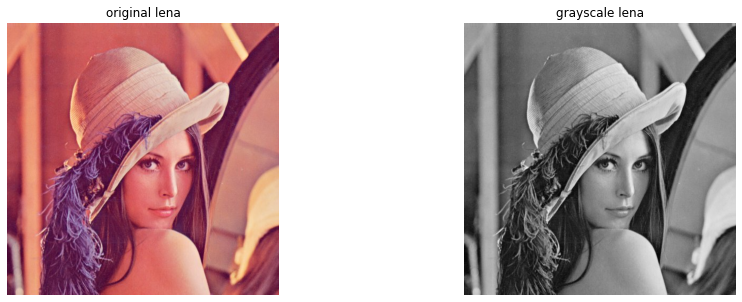

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15,5)) # create a subplot
axs[0].imshow(lena_img)
axs[0].axis('off')
axs[0].set_title('original lena')
axs[1].imshow(lena_gray, cmap='gray')
axs[1].axis('off')
axs[1].set_title('grayscale lena')
plt.show()

2. Implementieren Sie anschließend den in der Vorlesung behandelten Gauß-Filter mit einer variablen Kernelgröße, um das Bild zu glätten und Rauschen zu entfernen. Der Gauß-Filter wird durch eine zweidimensionale Gauß-Funktion definiert,
$$g(x,y) = \frac{1}{2\pi\sigma^2}\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right),$$
wobei $x$ und $y$ dem Abstand vom Ursprung auf der $x$- bzw. $y$-Achse und $\sigma$ der Standardabweichung der Verteilung entspricht. Wenden Sie auch hier das Zero-Padding an.

In [13]:
# you can change the values as you wish
kernel_size = 7
sigma = 1

In [14]:
# TODO Gaussian Blur on a grayscale image
def gaussFilter(img):
    def getGauss(win, kLen):
        # location/distance from midpoint to neighbours for x and y-direction:
        # example for 3x3 Kernel:
        # x: -1 0 1   y: -1 -1 -1
        #    -1 0 1 ,     0  0  0
        #    -1 0 1       1  1  1
        x,y = np.meshgrid(np.arange(-kLen,kLen+1), np.arange(-kLen,kLen+1))
        # gauss formula
        sig2 = sigma*sigma
        term1 = 1/(2 * np.pi * sig2)
        term2 = -(x*x + y*y)/(2 * sig2)
        k = term1 * np.exp(term2)
        # convolude and normalize
        val = np.sum( win*k )/ np.sum(k)

        return val

    h,w = img.shape
    newImg = np.full((h,w), 0, dtype='uint8')
    paddedImg = padImg(img, 0, kernel_size)

    for row in range(h):
        for col in range(w):
            window = paddedImg[row:row+kernel_size, col:col+kernel_size]
            newVal = getGauss(window, getKernelLen(kernel_size))
            newImg[row][col] = np.round(newVal)

    return newImg

In [15]:
lena_blur = gaussFilter(lena_gray)
print("done")

done


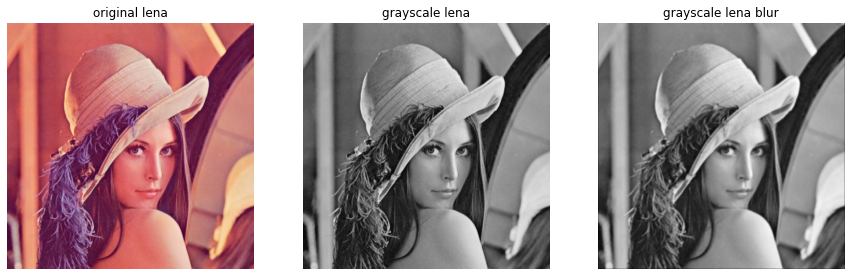

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15,5)) # create a subplot
axs[0].imshow(lena_img)
axs[0].set_title('original lena')
axs[0].axis('off')
axs[1].imshow(lena_gray, cmap='gray')
axs[1].set_title('grayscale lena')
axs[1].axis('off')
axs[2].imshow(lena_blur, cmap='gray')
axs[2].set_title('grayscale lena blur')
axs[2].axis('off')
plt.show()

3. Auf dem letzten Übungsblatt haben Sie den Sobel-Filter in der Theorie kennengelernt. Nun soll dieser praktisch angewendet werden. Berechnen Sie die Gradienten des Bildes, indem Sie die `sobel_edge()`-Funktion implementieren. Die Funktion gibt sowohl die Gradienten $G_x$ und $G_y$ als auch den Gradientenbetrag $M$ zurück, wobei M durch
$$M = \sqrt{G_x^2 + G_y^2}$$
definiert ist und dem Ergebnis des Sobel-Operators entspricht.

In [17]:
def sobel_edge(img):
    # TODO Sobel edge detection
    def sobelInGivenDir(filter):
        w,h = img.shape
        sobelGradient = np.full((h,w), 0, dtype='float')
        paddedImg = padImg(img,0,3)

        for row in range(h):
            for col in range(w):
                window = paddedImg[row:row+3, col:col+3]
                filtered = window * filter
                newVal = np.sum(filtered)
                sobelGradient[row][col] = newVal

        return sobelGradient

    """
    If value out of valid range i.e x<0 or x>255
    set to max or min
    """
    def setMinMaxRange(arr):
        arr[ arr < 0 ] = 0
        arr[ arr > 255 ] = 255

    sobelX = np.array( [ [-1,0,1],
                         [-2,0,2],
                         [-1,0,1] ])
    sobelY = np.array( [ [-1,-2,-1],
                         [0,0,0],
                         [1,2,1] ])

    G_x = sobelInGivenDir(sobelX)
    G_y = sobelInGivenDir(sobelY)
    M = np.round( np.sqrt( (G_x * G_x) + (G_y * G_y) ) )
    setMinMaxRange(M)

    return G_x, G_y, M

In [18]:
G_x, G_y, M = sobel_edge(lena_blur)
print("done")

done


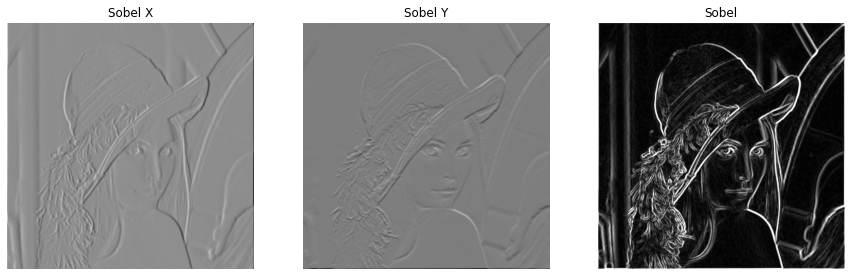

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15,5)) # create a subplot
axs[0].imshow(G_x, cmap = 'gray')
axs[0].set_title('Sobel X')
axs[0].axis('off')
axs[1].imshow(G_y, cmap = 'gray')
axs[1].set_title('Sobel Y')
axs[1].axis('off')
axs[2].imshow(M, cmap = 'gray')
axs[2].set_title('Sobel')
axs[2].axis('off')
plt.show()

4. Für die weiteren Schritte (die nicht mehr Teil dieser Aufgabe sind) benötigt der Canny Algorithmus noch die [Kantenrichtung](https://de.wikipedia.org/wiki/Canny-Algorithmus#Kantenrichtung). Berechnen Sie die Kantenrichtung, indem Sie die `edge_direction()`-Funktion implementieren. Die Funktion erhält den Gradienten in $x$-Richtung und den Gradienten in $y$-Richtung als Eingabeparameter und gibt ein `numpy()`-Array zurück. Die Werte in diesem Array sollen die Maßeinheit Grad besitzen.

In [20]:
def edge_direction(gradient_x, gradient_y): # 1P
    # TODO
    def convert2Degrees(dir):
        return dir * ( 180 / np.pi )

    return convert2Degrees( np.arctan2(gradient_x, gradient_y) )

In [21]:
edge_angle = edge_direction(G_x, G_y)

In [22]:
def non_max_supp(img, direction):
    height, width = img.shape
    result = np.zeros_like(img)
    direction[direction < 0] += 180
    
    # pixel has only 8 neighbours -> edge direction rounded to 0°, 45°, 90°, 135°
    for i in range(1, height-1):
        for j in range(1, width-1):
            # edge direction 0°
            if (0 <= direction[i, j] < 22.5) or (157.5 <= direction[i, j] <= 180):
                if max(img[i, j+1],  img[i, j-1]) <= img[i, j]:
                    result[i, j] = img[i, j]
                    
            # edge direction 45°
            elif (22.5 <= direction[i, j] < 67.5):
                if max(img[i-1, j-1], img[i+1, j+1]) <= img[i, j]:
                    result[i, j] = img[i, j]
                    
            # edge direction 90°
            elif (67.5 <= direction[i, j] < 112.5):
                if max(img[i+1, j], img[i-1, j]) <= img[i, j]:
                    result[i, j] = img[i, j]
                    
            # edge direction 135°
            elif (112.5 <= direction[i, j] < 157.5):
                if max(img[i+1, j-1], img[i-1, j+1]) <= img[i, j]:
                    result[i, j] = img[i, j]
                    
    return result

In [23]:
non_max_supp_img = non_max_supp(M, edge_angle)

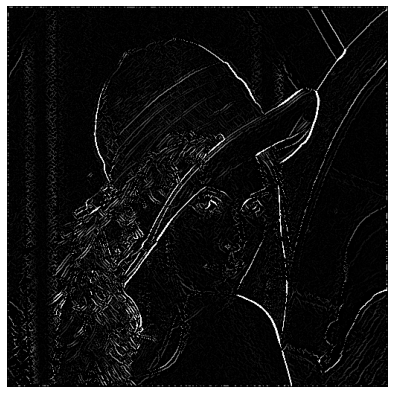

In [24]:
plt.figure(figsize=(7, 7))
plt.imshow(non_max_supp_img, cmap='gray')
# plt.imsave('test.jpg', non, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
def hysteresis_threshold(img, th_high, th_low):
    result = np.zeros_like(img)
    height, width = img.shape
    # get highest and lowest value of img depending on threshold
    high = img.max() * th_high
    low = high * th_low
    
    strongEdges_x, strongEdges_y = np.where(img >= high) # find idx of strong edges
    weakEdges_x, weakEdges_y = np.where((img <= high) & (img > low)) # find idx of weak edges
    
    result[strongEdges_x, strongEdges_y] = 255 # set strong edges to 255
    result[weakEdges_x, weakEdges_y] = 50 # set weak edges to 50 - the value doesnt matter here
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            if result[i, j] == 50: # is pixel a weak edge?
                img_area = result[i-1:i+2, j:j+2]
                if 255 in img_area: # check if strong edge is in area
                    result[i, j] = 255
                else:
                    result[i, j] = 0
    return result

In [26]:
# you can change the values as you wish
high_th = 0.3
low_th = 0.1
result_canny = hysteresis_threshold(non_max_supp_img, high_th, low_th)

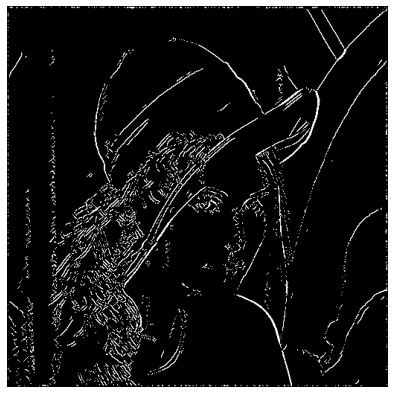

In [27]:
# not a perfect implementation of this algorithmn but we can see some results
# if you want you can try to implement it by yourself
plt.figure(figsize=(7, 7))
plt.imshow(result_canny, cmap='gray')
# plt.imsave('test.jpg', result_canny, cmap='gray')
plt.axis('off')
plt.show()